# Overview of available variables and analysis results

Data analysis is supposed to be done in script `EVAL_SCRIPT.py` which can be found in the parent directory. This script is supposed to create output files and plots that may be used here to summarise the results.

In [1]:
import os
import pyaerocom as pya
pya.change_verbosity('critical')

import EVAL_POST as helpers

IMPORT_MODEL_DATA = 0


2018-08-21 14:05:13,682:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini


Check for updates in file containing models.

In [2]:
model_info_file = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/reference-list'

if os.path.exists(model_info_file):
    with open(model_info_file) as f:
        for line in f:
            if line.strip():
                print(line)

1 NorESM: AlfKirkevag MetNo

  CAM6-Oslo_NF2kNucl_7jun2018AK

attention

is on /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST

2 OsloCTM3 : Gunnar Myhre - Marianne Lund CICERO

OsloCTM2_INSITU  (includes extinction and absorption coefficients)

is probably outdated...

3 TM5-AP3: Twan van Noye KNMI

TM5_AP3-CTRL2016

and

TM5_AP3-INSITU (daily files are missing, but Jan should produce them)



### Define models, obsnetworks, years, and variables

In [3]:
YEARS = [2010, 2008, 9999]

# List of models considered
MODEL_LIST = ['CAM6-Oslo_NF2kNucl_7jun2018AK',
              'OsloCTM2_INSITU',
              'TM5_AP3-CTRL2016',
              'TM5_AP3-INSITU']

# List of ungridded obsnetworks considered (so far)
UNGRIDDED_OBS_NETWORKS = {'AeronetSunV2Lev2.daily' : 'od550aer',
                          'AeronetSunV3Lev2.daily' : 'od550aer',
                          'AeronetSDAV2Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetSDAV3Lev2.daily' : ['od550lt1aer', 
                                                      'od550gt1aer'],
                          'AeronetInvV2Lev2.daily' : 'abs550aer',
                          'AeronetInvV3Lev2.daily' : 'abs550aer'
                          }

# Get unique variables
VARS = []
for k, v in UNGRIDDED_OBS_NETWORKS.items():
    if isinstance(v, str):
        VARS.append(v)
    else:
        VARS.extend(v)
VARS = list(dict.fromkeys(VARS))

### Import model results

In [4]:
if IMPORT_MODEL_DATA:
    read_models = pya.io.ReadGriddedMulti(MODEL_LIST)
    read_models.read_individual_years(VARS, YEARS)

Print overview of what is in the models

In [5]:
if IMPORT_MODEL_DATA:
    print(read_models)

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [6]:
results = helpers.load_result_files()

In [7]:
results = helpers.calc_stats(results)
results[0]

{'var_name': 'od550aer',
 'ts_type': 'monthly',
 'filter_name': 'WORLD-noMOUNTAINS',
 'start': Timestamp('2008-01-16 00:00:00'),
 'stop': Timestamp('2008-12-15 00:00:00'),
 'data_source_idx': ['MODIS6.aqua', 'OsloCTM2_INSITU'],
 'model_id': 'OsloCTM2_INSITU',
 'obs_id': 'MODIS6.aqua',
 'year': 2008,
 'data':              ref      data
 0       0.016000  0.024142
 1       0.020000  0.024240
 2       0.037000  0.024667
 3       0.018000  0.029461
 4       0.072000  0.030581
 5       0.000000  0.031568
 6       0.000000  0.031568
 7       0.000000  0.030541
 8       0.027000  0.029256
 9       0.132000  0.029256
 10      0.013000  0.028451
 11      0.026000  0.028596
 12      0.000000  0.032312
 13      0.032000  0.032879
 14      0.001000  0.025887
 15      0.046000  0.026489
 16      0.059000  0.026489
 17      0.040000  0.024020
 18      0.290000  0.025100
 19      0.084000  0.018612
 20      0.038000  0.023656
 21      0.023800  0.023656
 22      0.031800  0.027166
 23      0.043400  

In [8]:
table = helpers.to_multiindex_dataframe(results)
table.sort_index(inplace=True)
table

Bias  \
Model            Year Freq    Variable    Obs                                  
OsloCTM2_INSITU  2008 monthly od550aer    AeronetSunV2Lev2.daily  -48.501611   
                                          AeronetSunV3Lev2.daily  -56.196623   
                                          MODIS6.aqua             -63.063545   
                                          MODIS6.terra            -66.626111   
                      yearly  od550aer    MODIS6.aqua             -66.011154   
                                          MODIS6.terra            -68.980735   
TM5_AP3-CTRL2016 2008 monthly abs550aer   AeronetInvV2Lev2.daily  -46.692645   
                                          AeronetInvV3Lev2.daily  -36.976870   
                              od550aer    AeronetSunV2Lev2.daily    0.914810   
                                          AeronetSunV3Lev2.daily  -11.405708   
                                          MODIS6.aqua             -19.689961   
                                          MODIS6.terra            -27.477823   
                              od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                          AeronetSDAV3Lev2.daily -100.000000   
                      yearly  od550aer    MODIS6.aqua             -26.311017   
                                          MODIS6.terra            -32.787338   
                 2010 monthly abs550aer   AeronetInvV2Lev2.daily  -47.327784   
                                          AeronetInvV3Lev2.daily  -37.627405   
                              od550aer    AeronetSunV2Lev2.daily   -0.085802   
                                          AeronetSunV3Lev2.daily   -8.427801   
                                          MODIS6.aqua             -18.691015   
                                          MODIS6.terra            -27.671878   
                              od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                          AeronetSDAV3Lev2.daily -100.000000   
                      yearly  od550aer    MODIS6.aqua             -25.067594   
                                          MODIS6.terra            -31.898424   
TM5_AP3-INSITU   2010 monthly abs550aer   AeronetInvV2Lev2.daily  -51.630777   
                                          AeronetInvV3Lev2.daily  -42.872418   
                              od550aer    AeronetSunV2Lev2.daily   -2.974804   
                                          AeronetSunV3Lev2.daily  -11.279555   
                                          MODIS6.aqua             -23.729018   
                                          MODIS6.terra            -32.155734   
                              od550lt1aer AeronetSDAV2Lev2.daily   10.296436   
                                          AeronetSDAV3Lev2.daily    1.436546   
                      yearly  od550aer    MODIS6.aqua             -29.677098   
                                          MODIS6.terra            -36.090511   

                                                                       RMS  \
Model            Year Freq    Variable    Obs                                
OsloCTM2_INSITU  2008 monthly od550aer    AeronetSunV2Lev2.daily  0.179537   
                                          AeronetSunV3Lev2.daily  0.231221   
                                          MODIS6.aqua             0.160171   
                                          MODIS6.terra            0.173486   
                      yearly  od550aer    MODIS6.aqua             0.160594   
                                          MODIS6.terra            0.161014   
TM5_AP3-CTRL2016 2008 monthly abs550aer   AeronetInvV2Lev2.daily  0.024975   
                                          AeronetInvV3Lev2.daily  0.019355   
                              od550aer    AeronetSunV2Lev2.daily  0.118533   
                                          AeronetSunV3Lev2.daily  0.148455   
                                          MODIS6.aqua             0.125377   
                 

In [9]:
bias = table['Bias'].unstack(['Model', 'Year', 'Freq'])
from IPython.display import display, Math

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

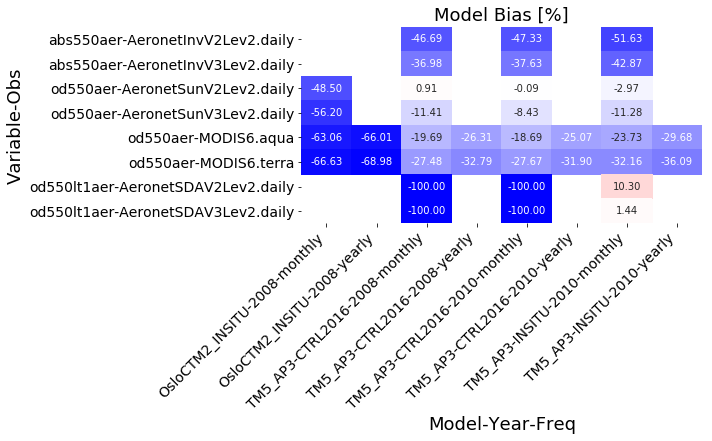

In [10]:
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('Model Bias [%]')
display(Math(r'BIAS [\%] = 100 \cdot \frac{\sum_{i=1}^{N}M_i-O_i}{\sum_{i=1}^{N}O_i}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

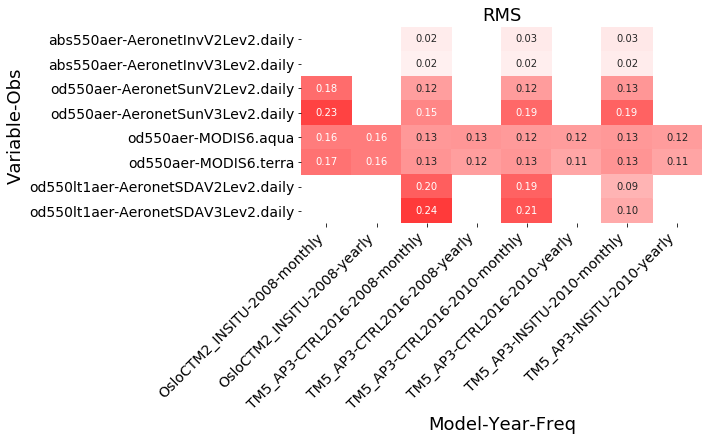

In [11]:
rms = table['RMS'].unstack(['Model', 'Year', 'Freq'])
ax = pya.plot.heatmaps.df_to_heatmap(rms, color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('RMS')
display(Math(r'RMS = \sqrt{\frac{1}{N}\,\sum_{i=1}^{N}(M-O)_i^2}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

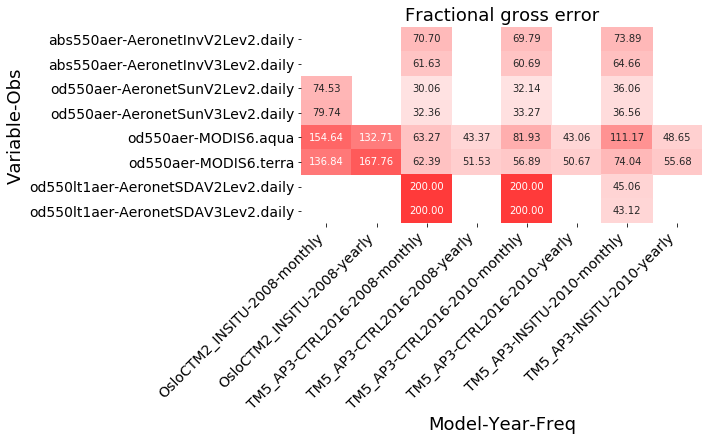

In [12]:
fge = table['FGE'].unstack(['Model', 'Year', 'Freq'])

ax = pya.plot.heatmaps.df_to_heatmap(fge, color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Fractional gross error')
display(Math(r'FGE\,[\%] = \frac{2}{N}\sum_{i=1}^{N}\left|\frac{M_i-O_i}{M_i+O_i}\right|'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

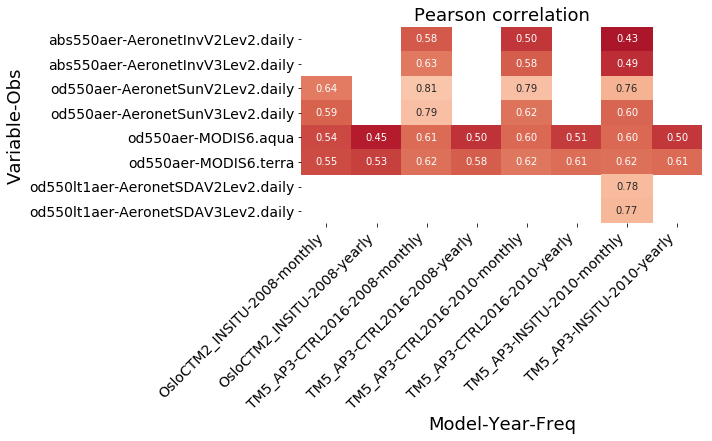

In [13]:
corr = table['R'].unstack(['Model', 'Year', 'Freq'])

ax = pya.plot.heatmaps.df_to_heatmap(corr, cmap='RdGy', color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Pearson correlation')

display(Math(r'R = \frac{\sum_{i=1}^{N}(M_i-\bar{M})(O_i-\bar{O})}'
                         '{\sqrt{\sum_{i=1}^{N}(M_i-\\bar{M})^2}\sqrt{\sum_{i=1}^{N}(O_i-\\bar{O})^2}}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

## Retrieval of statistical parameters from collocated data (testing)

Currently, the statistical parameters like RMS are computed from the difference vector of the model values and the corresponding observations. This method does not take into account situations where the slope of the distribution in the scatter plot deviates from 1, i.e. where the performance of the model as a function of the retrieved parameter is dependent on the magnitude of the parameter. 

This section aims to illustrate this issue and suggests to use a linear fit (in loglog space) to consider both slope and offset (bias) of the model values relative to the observations.

### 2 examples

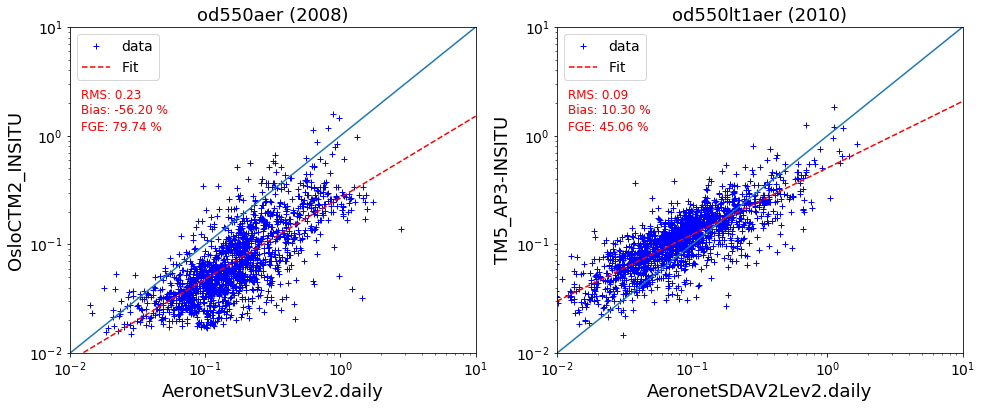

In [20]:
import matplotlib.pyplot as plt
def plot_scatter(res, ax):
    data=res['data']
    

    x,y = data['ref'], data['data']
    ax.loglog(x, y, ' +b', label='data')
    ax.set_xlim([.01, 10])
    ax.set_ylim([.01, 10])
    ax.plot([.01, 10], [.01, 10])

    ax.set_xlabel(res['obs_id'])
    ax.set_ylabel(res['model_id'])
    ax.set_title('{} ({})'.format(res['var_name'], res['year']))
    m, c  = np.polyfit(np.log(x), np.log(y), 1)
    xvals= np.linspace(.01, 10, 100)
    y_fit = np.exp(m*np.log(xvals) + c)
    ax.plot(xvals, y_fit, '--r', label='Fit')
    ax.text(0.012, 2.2, 'RMS: {:.2f}'.format(res['rms']), color='r', fontsize=12)
    ax.text(0.012, 1.6, 'Bias: {:.2f} %'.format(res['nmb']), color='r', fontsize=12)
    ax.text(0.012, 1.1, 'FGE: {:.2f} %'.format(res['fge']), color='r', fontsize=12)
    
    ax.legend()
    
    return ax

ex1 = results[2]
ex2 = results[6]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
plot_scatter(ex1, ax1)
plot_scatter(ex2, ax2)

Assuming that the observations are true, in the ideal case, the results should scatter around the one-one line in the plot, but clearly, the fitted result shows, that the distribution is slanted with respect to the one-one line. **This is not represented in the statistical parameters that are caclulated based on the difference signal**.

Let's look at the difference signal of both examples as a function of the AOD:

Text(0,0.5,'od550aer (model - obs)')

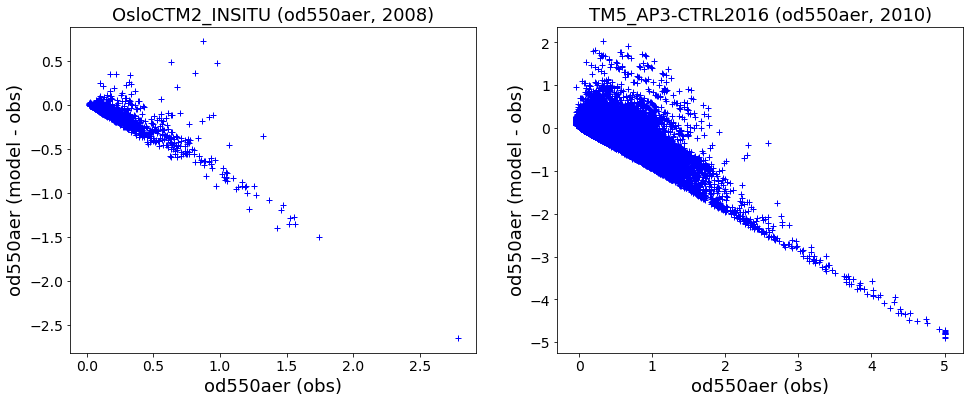

In [15]:
# cpmpute difference vectors for both example datasets
diff1 = ex1['data']['data'] - ex1['data']['ref']
diff2 = ex2['data']['data'] - ex2['data']['ref']

# plot differences against corresponding values (using obs values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

ax1.plot(ex1['data']['ref'], diff1, ' +b', label='Difference (example 1)')
ax1.set_title('{} ({}, {})'.format(ex1['model_id'], ex1['var_name'], ex1['year']))
ax1.set_xlabel('od550aer (obs)')
ax1.set_ylabel('od550aer (model - obs)')
ax2.plot(ex2['data']['ref'], diff2, ' +b', label='Difference (example 2)')
ax2.set_title('{} ({}, {})'.format(ex2['model_id'], ex2['var_name'], ex2['year']))
ax2.set_xlabel('od550aer (obs)')
ax2.set_ylabel('od550aer (model - obs)')

From the difference signals it becomes even more obvious that the ***performance*** of the models (i.e. their capability to *reproduce* the observations) is clearly dependent on the value of the AOD. E.g. model *OsloCTM2_INSITU 2008* shows linearly increasing deviations to the observations with increasing AOD. At low AODs, however, it matches considerably well.

**This is useful information and currently not represented by the statistical parameters that disregard the fact that the performance may be dependent on the values of the variable itself**

# Experimental area

KeyError: 'obs'

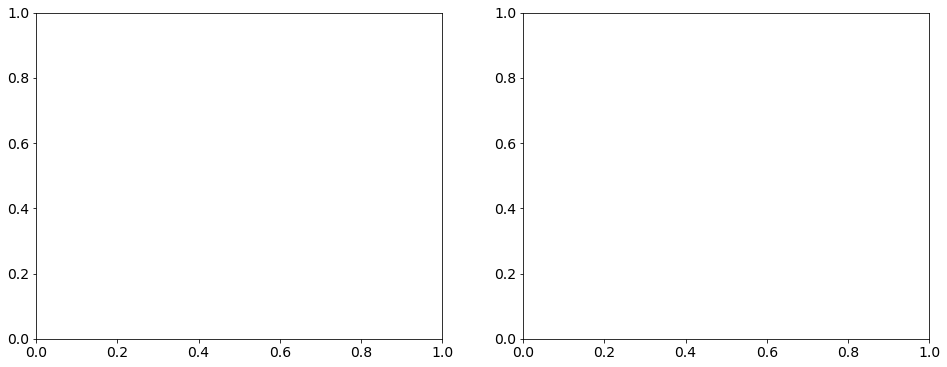

In [16]:
data = results[1]['data']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

x,y = data['obs'], data['model']
ax1.loglog(x, y, ' +b', label='data')

m, c  = np.polyfit(np.log(x), np.log(y), 1)
xvals= np.linspace(.01, 10, 100)
y_fit = np.exp(m*np.log(xvals) + c)
ax1.plot(xvals, y_fit, '--r', label='Fit: {:.2f}x + {:.2f}'.format(m, c))
ax1.set_xlim([.01, 10])
ax1.set_ylim([.01, 10])
ax1.plot([.01, 10], [.01, 10])
ax1.legend()
ax1.set_xlabel('Aeronet Sun V2 L2')
ax1.set_ylabel('TM5_AP3_CTRL2016')
ax1.set_title('od550aer (2010)')

difference = y-x
ax2.plot(x, difference, ' +b', label="Model - Obs")
ax2.set_xlabel('Aeronet Sun V2 L2')
ax2.set_ylabel('Difference (model - obs)')


diff_fit = np.polyfit(x, difference, 1)
ax2.plot(xvals, np.poly1d(diff_fit)(xvals), '--r', label='Fit: {:.2f}x + {:.2f}'.format(diff_fit[0], diff_fit[1]))
ax2.legend()
ax2.set_xlim([0, 10])

In [ ]:
import seaborn as sns
#mybins=np.logspace(0,np.log(10),100)
g = sns.JointGrid('obs', 'model', data, xlim=[0.01,10],ylim=[0.01,10])
g = g.plot(sns.regplot, sns.distplot)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')